## Markov Chain Monte Carlo (MCMC) technique

Este código utiliza un método llamado muestreo de Gibbs (Gibbs Sampling) para generar muestras de una distribución normal bivariada. El objetivo del código es generar muestras que sigan esta distribución conjunta, considerando la dependencia entre x e y.


Una distribución normal bivariada es una distribución conjunta para dos variables, x e y, que tienen:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu1=2 # media x
mu2=3 #media y
sigma1=1 # desviacion estandar para x
sigma2=1 # desviacion estandar para y
rho=0.8 #Coeficiente de correlación: Un valor entre -1 y 1 que mide qué tan dependientes están xx e yy:
n=2000 # Total de muestras que se generarán.
burn_in=1000 #bNúmero de muestras iniciales que se descartarán porque pueden estar influenciadas por los valores iniciales.

In [5]:
#Se crean arrays para almacenar las muestras.
x=np.zeros(n)
y=np.zeros(n)

#se inicializan en 0
x[0]=0
y[0]=0

La distribución condicional de x dado y es normal:
$
media=\mu_1+\rho*\frac{\sigma_1}{\sigma_2}(y[i-1]-\mu_2),
desviación estandar=\sqrt{(1-\rho^2)*\sigma_1^2}
$

La distribución condicional de y dado x es tambien normal:
$
media=\mu_2+\rho*\frac{\sigma_2}{\sigma_1}(x[i]-\mu_1),
desviación estandar=\sqrt{(1-\rho^2)*\sigma_2^2}
$

In [8]:
for i in range(1,n):
    x[i]=np.random.normal(mu1+rho*(y[i-1]-mu2)*sigma1/sigma2, np.sqrt((1-rho**2)*sigma1**2)
    y[i]=np.random.normal(mu2+rho*(x[i]-mu1)*sigma2/sigma1, np.sqrt((1-rho**2)*sigma2**2)

Se eliminan las primeras burn\_inburn_in muestras porque pueden no seguir la distribución deseada. Esto asegura que el proceso de Gibbs Sampling haya convergido al estado estacionario.

In [9]:
x=x[burn_in:]
y=y[burn_in:]

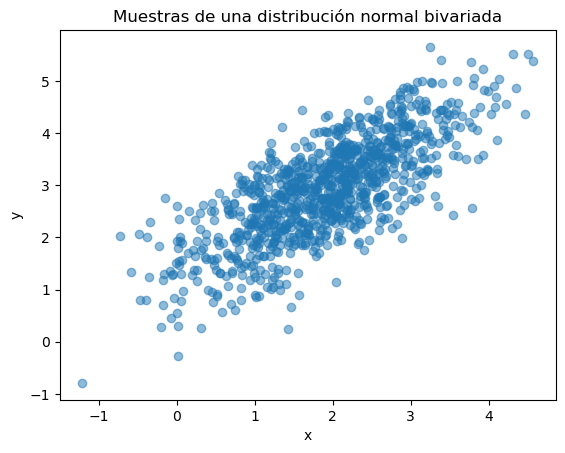

In [19]:
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Muestras de una distribución normal bivariada")
plt.show()

In [20]:
print(f"Media de x: {np.mean(x):.2f}, Desviación estándar de x: {np.std(x):.2f}")
print(f"Media de y: {np.mean(y):.2f}, Desviación estándar de y: {np.std(y):.2f}")

Media de x: 1.90, Desviación estándar de x: 0.92
Media de y: 2.92, Desviación estándar de y: 0.96


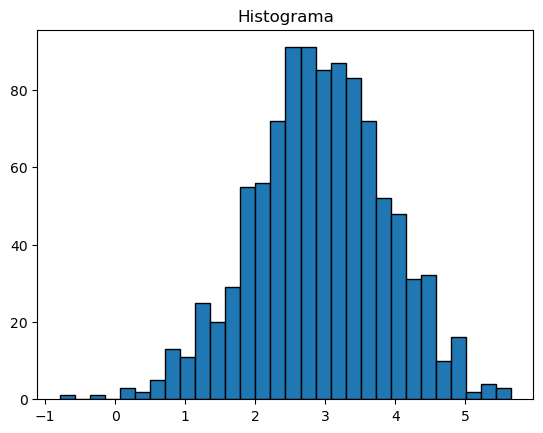

In [18]:
plt.hist(y,bins=30,edgecolor='black')
plt.title("Histograma");

## Ejemplo con Metropolis

Estimación Bayesiana de la Media de Calificaciones. Asumimos que:

* Las calificaciones de los estudiantes siguen una distribución normal con una desviación estándar conocida de 15.
* Hemos observado una única calificación de un estudiante con un valor de 100.
* Queremos estimar la media de las calificaciones usando MCMC (Markov Chain Monte Carlo).
* Dado que la distribución a posteriori es normal, este es un ejemplo simplificado donde MCMC no es estrictamente necesario, pero ilustra bien el método.

### Implementación paso a paso de MCMC
* Paso 1: Definir los parámetros conocidos.	Asumimos que la desviación estándar es 15, y observamos una calificación de 100.
* Paso 2: Definir el Prior.	Asumimos que la media de las calificaciones sigue una distribución normal centrada en 100 con una desviación estándar de 15.
* Paso 3: Definir la verosimilitud.	Dada una media propuesta, calculamos qué tan probable es observar una calificación de 100.
* Paso 4: Definir la posterior.	La distribución a posteriori es proporcional a la verosimilitud × prior.
* Paso 5: Implementar el algoritmo de Metropolis.	Generamos una cadena de muestras utilizando MCMC.
* Paso 5.1: Proponer una nueva muestra.	Agregamos ruido aleatorio para generar un nuevo candidato.
* Paso 5.2: Calcular la razón de aceptación.	Calculamos qué tan mejor es la nueva muestra en comparación con la anterior.
* Paso 5.3: Aceptar o rechazar.	Si la nueva muestra es mejor, la aceptamos; de lo contrario, aún podríamos aceptarla con cierta probabilidad.
* Paso 6: Ejecutar MCMC.	Generamos 5000 muestras utilizando este proceso.
* Paso 7: Visualizar resultados.	Graficamos tanto la cadena de MCMC como la distribución a posteriori.
* Paso 8: Calcular estadísticas resumen.	Estimamos la media y la desviación estándar de la distribución a posteriori.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 🔹 Step 1: Define Known Parameters
true_std_dev = 15  # Given standard deviation
observed_score = 100  # Single observed data point
num_samples = 5000  # Number of MCMC iterations

# 🔹 Step 2: Define the Prior Distribution (Assume Normal)
def prior(mu):
    return stats.norm(100, 15).pdf(mu)  # Prior belief about mean test score

# 🔹 Step 3: Define the Likelihood Function
def likelihood(mu, observed_score=100, sigma=15):
    return stats.norm(mu, sigma).pdf(observed_score)  # Likelihood of observed score given mean

# 🔹 Step 4: Define the Posterior Function (Proportional to Prior * Likelihood)
def posterior(mu):
    return likelihood(mu) * prior(mu)

# 🔹 Step 5: Implement the Metropolis Algorithm
def metropolis_sampler(num_samples, proposal_std=5):
    samples = np.zeros(num_samples)  # Store MCMC chain
    samples[0] = 110  # Start with a plausible guess

    for i in range(1, num_samples):
        # 🔹 Step 5.1: Propose a New Sample
        proposed_sample = samples[i-1] + np.random.normal(0, proposal_std)
        
        # 🔹 Step 5.2: Compute Acceptance Ratio
        acceptance_ratio = posterior(proposed_sample) / posterior(samples[i-1])
        
        # 🔹 Step 5.3: Accept or Reject the Proposal
        if np.random.rand() < acceptance_ratio:
            samples[i] = proposed_sample  # Accept proposal
        else:
            samples[i] = samples[i-1]  # Reject and retain previous sample
    
    return samples

# 🔹 Step 6: Run MCMC and Store Results
mcmc_samples = metropolis_sampler(num_samples)

# 🔹 Step 7: Visualize Results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 🔹 Step 7.1: Plot the Markov Chain
axs[0].plot(mcmc_samples, color="blue", alpha=0.6)
axs[0].set_title("MCMC Chain (Metropolis Sampling)")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Sampled Mean Test Score")

# 🔹 Step 7.2: Plot Histogram of Samples
axs[1].hist(mcmc_samples, bins=30, density=True, color="orange", alpha=0.7)
axs[1].set_title("Posterior Distribution of Mean Test Score")
axs[1].set_xlabel("Mean Test Score")
axs[1].set_ylabel("Density")

# 🔹 Show the Plots
plt.tight_layout()
plt.show()

# 🔹 Step 8: Compute Summary Statistics
posterior_mean = np.mean(mcmc_samples)
posterior_std = np.std(mcmc_samples)
print(f"Estimated Mean Test Score (Posterior Mean): {posterior_mean:.2f}")
print(f"Estimated Standard Deviation: {posterior_std:.2f}")
